**DATA SET**


Transnational data set which contains all the transactions between 01.12.2010-09.12.2011 for a UK-based and registred non-store online retail. 

*Company sells unique all-occasion gifts*

*The majority of the customers are wholesalers*


**ATTRIBUTE INFORMATION**




**InvoiceNo** (Invoice number): 6-digit integral number uniquely assigned to each transaction. (If InvoiceNo starts with 'c', it means cancellation).

**StockCode**(Product Code): 5-digit integral number uniquely assigned to each different product.

**Description** (Product name)

**Quantity**: quantities of each product per transaction.

**InvoiceDate**: day and time when each transaction was generated.

**UnitPrice**: product price per unit.

**CustomerID**: 5-digit integral number uniquely assigned to each customer.

**Country**: name of the country where each customer resides.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

**DATA CLEANING**



Change **InvoiceDate** from *object Dtype* to *datetime64*

Change **CustomerID** from *float64 Dtype* to *object*

In [7]:
dat = pd.read_csv('data.csv',encoding='unicode_escape', sep=";")

pd.set_option('display.max_columns', 500)

dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
dat.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12.01.2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12.01.2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12.01.2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12.01.2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12.01.2010 08:26,3.39,17850.0,United Kingdom


In [9]:
dat['InvoiceDate'] = pd.to_datetime(dat['InvoiceDate'])
dat.CustomerID = dat.CustomerID.astype(object)
dat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Any missing values? **YES**



In [10]:
dat.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
dat.isnull().sum() / dat.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

There are almost **25%** (135080) of the **CustomerID** column missing and less than **1%** (1454) of the **Description** column missing. 

Check to see if the rows with the missing **Description** values are also missing **CustomerID** values in order to *eliminate unnecessary work*.

In [12]:
pd.set_option('display.max_rows', 1000)
null_data = dat[dat.isnull().any(axis=1)]
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135080 non-null  object        
 1   StockCode    135080 non-null  object        
 2   Description  133626 non-null  object        
 3   Quantity     135080 non-null  int64         
 4   InvoiceDate  135080 non-null  datetime64[ns]
 5   UnitPrice    135080 non-null  float64       
 6   CustomerID   0 non-null       object        
 7   Country      135080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.3+ MB


All the misssing values for the **Description** column are also missing **CustomerID** values and for every row the UnitPrice is 0 and the Quantity is either positive or negative. 

Drop all transactions with missing **Descriptions**, with **UnitPrice**=0 and missing **CustomerID** in order to make accurate insights for this data analysis.

In [13]:
null_data = dat[dat['Description'].isnull()]
null_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279709,561362,84415A,NaN,-11,2011-07-26 15:41:00,0.0,NaN,United Kingdom
148106,549170,82545A,NaN,-4,2011-04-06 17:25:00,0.0,NaN,United Kingdom
211593,555391,22501,NaN,-10,2011-06-02 16:29:00,0.0,NaN,United Kingdom
205712,554828,16049,NaN,74,2011-05-26 15:21:00,0.0,NaN,United Kingdom
277394,561110,85087,NaN,-16,2011-07-25 11:44:00,0.0,NaN,United Kingdom


In [14]:
dat = dat.dropna()
dat.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

How many transaction cancellations do we have? 
(cancelled  transaction = **InvoiceNo** starts with '**c**') 

**2.18%**

Drop these values too in order to make accurate predictions. 

In [15]:
dat["IsCancelled"]=np.where(dat.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
dat.IsCancelled.value_counts() / dat.shape[0] * 100

False    97.81112
True      2.18888
Name: IsCancelled, dtype: float64

In [17]:
dat.loc[dat.IsCancelled==True].describe()

,Quantity,UnitPrice
count,8905.000000,8905.000000
mean,-30.859966,18.845519
std,1170.154939,444.366043
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [18]:
dat = dat.loc[dat.IsCancelled==False].copy()
dat = dat.drop("IsCancelled", axis=1)

**STOCK CODES AND DESCRIPTIONS**

There are **3665 unique StockCodes** and **3877 unique Descriptions** which mean that the retailer sells many different types of products.


Looking at the most common StockCodes and Descriptions being sold, we can notice that our top 20 most frequent StockCodes and descriptions match up with eachother in terms of level of frequency. 

In [19]:
dat.StockCode.nunique(), dat.Description.nunique()

(3665, 3877)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


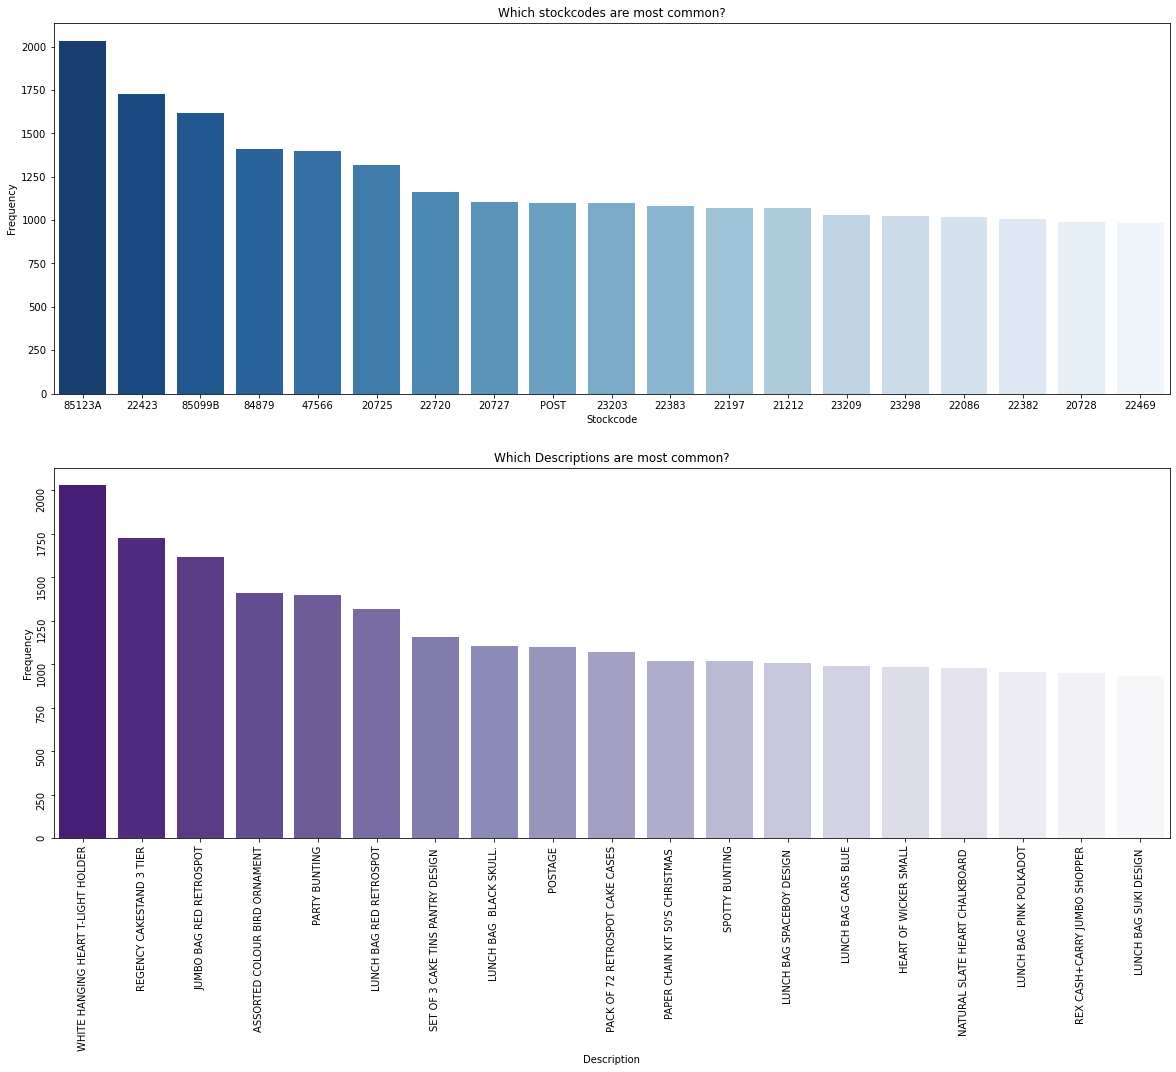

In [19]:
stockcode_frequency = dat.StockCode.value_counts().sort_values(ascending=False)
description_frequency = dat.Description.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette="Blues_r")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette="Purples_r")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Description")
ax[1].tick_params(labelrotation=90)

ax[1].set_title("Which Descriptions are most common?");

**CUSTOMERS AND COUNTRIES**

***What customers and what countries had the most transactions?***

Thus, we compute the correlation between the top customers and countries and we saw that the majority of transactions take place in UK. It appears that we have a few outliers in our top customers group where the top country is Ireland and the Netherlands. 

However, the majority is from the United Kingdom. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


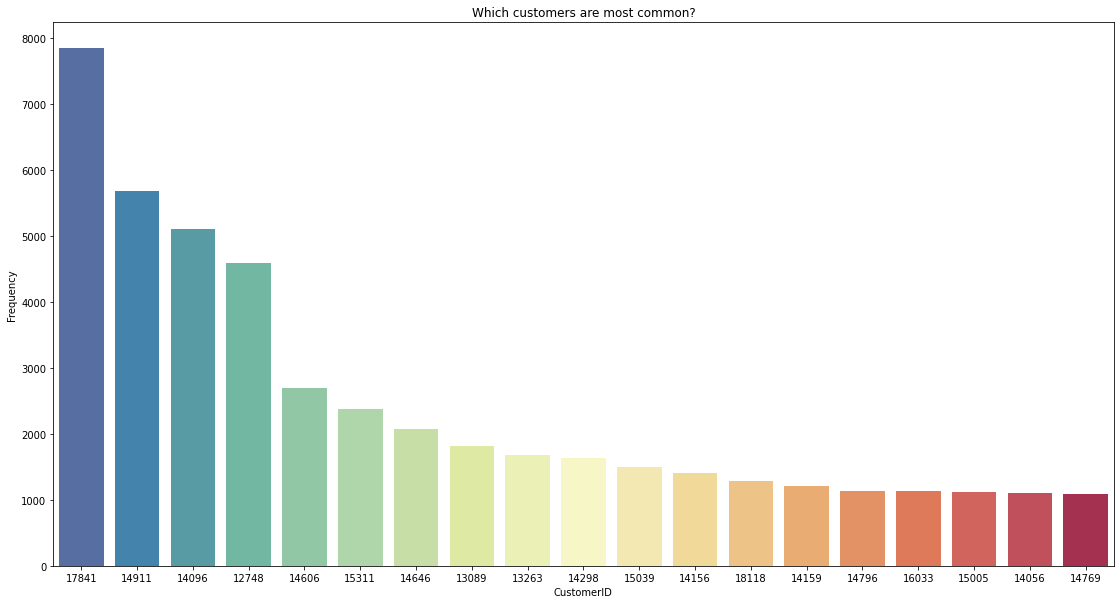

In [20]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
plt.figure(figsize=(19,10))
customer_frequency.index = customer_frequency.index.astype('Int64') 
sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette="Spectral_r")
plt.ylabel("Frequency")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


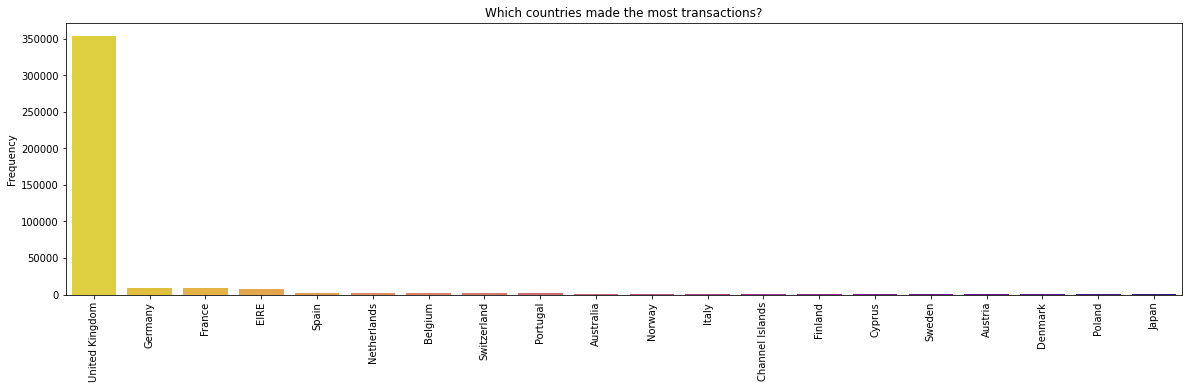

In [21]:
country_frequency = dat.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_frequency.index, country_frequency.values, palette="plasma_r")
plt.ylabel("Frequency")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);

In [22]:
x = dat.groupby(['CustomerID','Country']).size().sort_values(ascending=False).iloc[0:19]
pd.DataFrame(x)

,,0
CustomerID,Country,
17841.0,United Kingdom,7847
14911.0,EIRE,5677
14096.0,United Kingdom,5111
12748.0,United Kingdom,4596
14606.0,United Kingdom,2700
15311.0,United Kingdom,2379
14646.0,Netherlands,2080
13089.0,United Kingdom,1818
13263.0,United Kingdom,1677


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


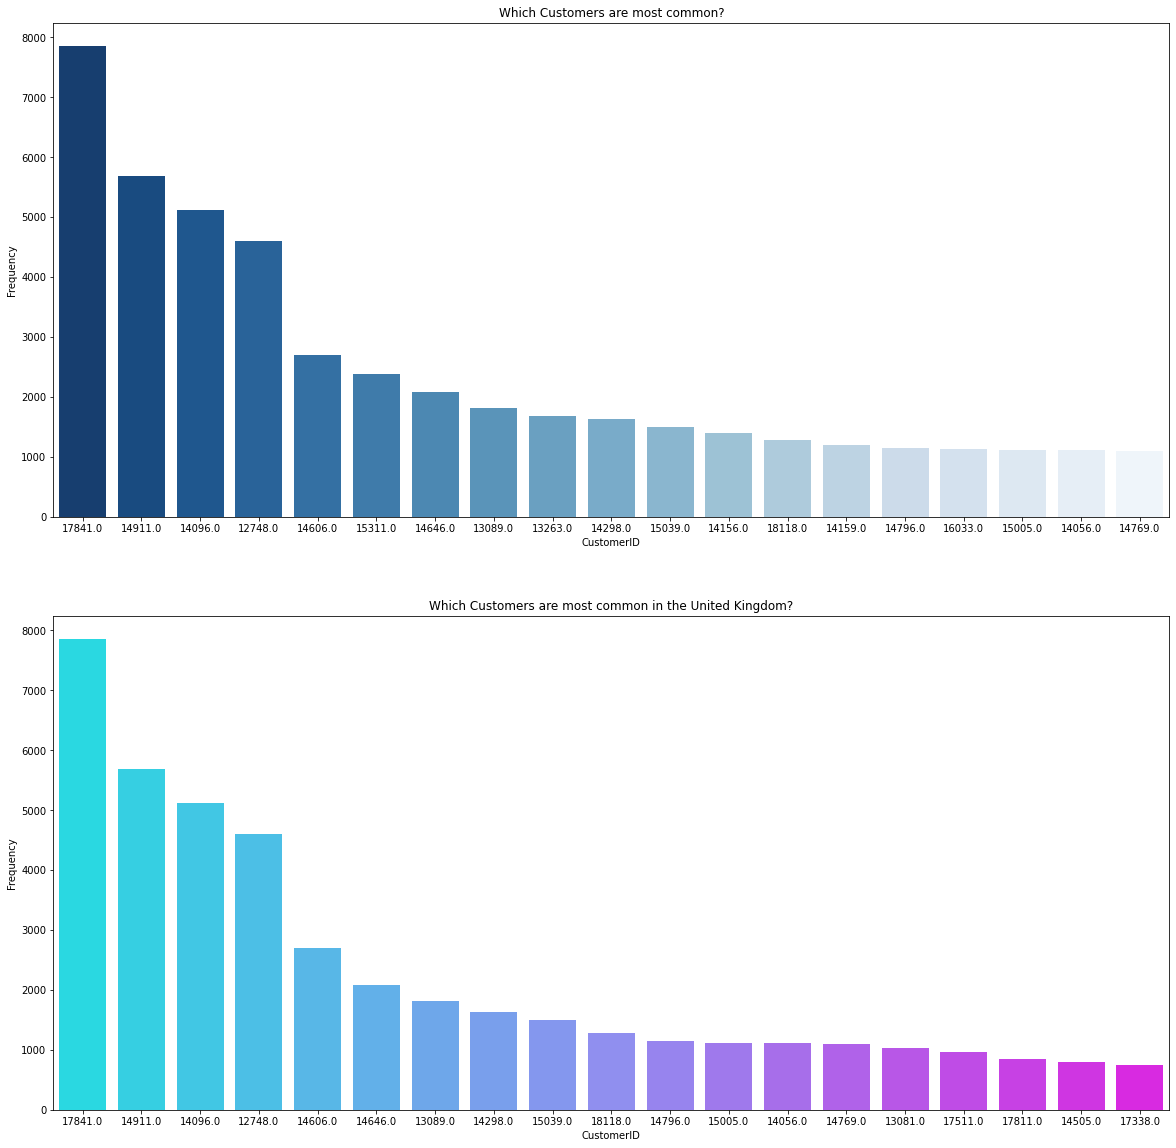

In [23]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
uk_customers = dat.groupby(dat['CustomerID']).size().where(dat['Country'] == 'United Kingdom').sort_values(ascending=False).iloc[0:19]
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(customer_frequency.index,
            customer_frequency.values,
            ax = ax[0], palette="Blues_r", order=customer_frequency.index)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("CustomerID")
ax[0].set_title("Which Customers are most common?");
sns.barplot(uk_customers.index,
            uk_customers.values,
            ax = ax[1], palette="cool", order=uk_customers.index)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("CustomerID")
ax[1].set_title("Which Customers are most common in the United Kingdom?");

**UNIT PRICE AND QUANTITY**

In order to proceed with the time-series analysis, we graphed the distribution for the UnitPrices and saw that a lot of prices are quite small and there are a few outliers that are very large.

Because of the high frequency of small transactions we focused on the transactions with prices in the log-unit-price graph. (the majority od the prices are between -2 and 3 => exponent of -2 and exponent of 3)


In [24]:
dat.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [25]:
dat = dat.loc[dat.UnitPrice > 0].copy()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


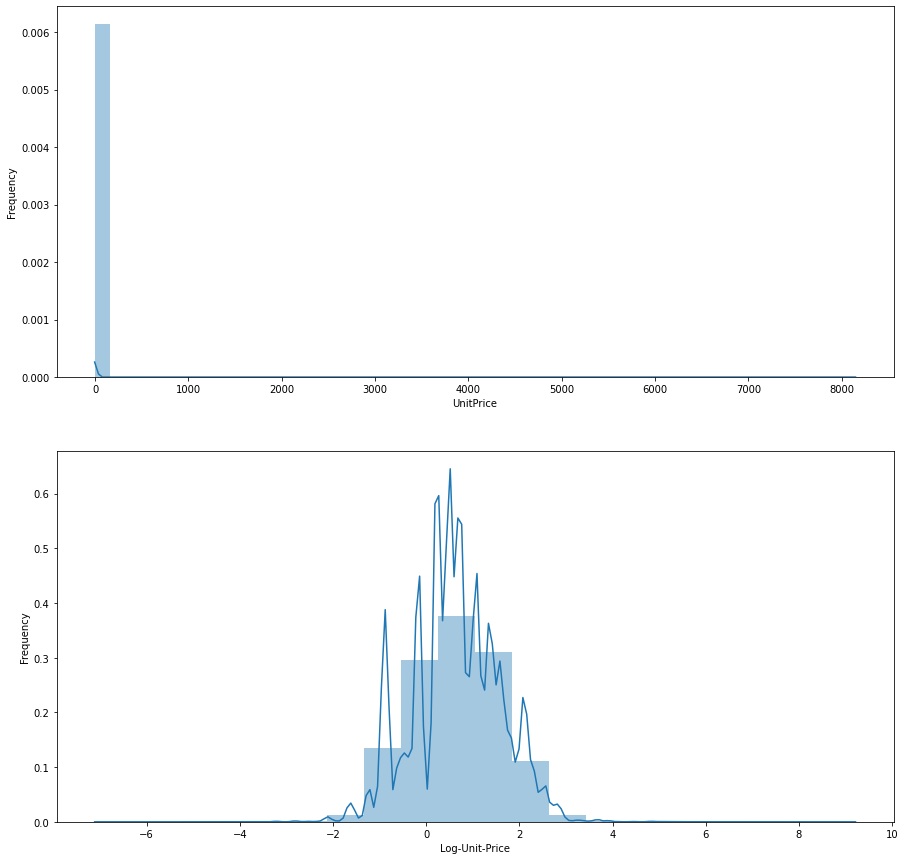

In [26]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [27]:
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

Thus, hte majority of our distribution lies between 0.1 and 20.1 so we deleted all the outliers outside this range.

In [28]:
dat = dat.loc[(dat.UnitPrice > 0.1) & (dat.UnitPrice < 20)].copy()

In [29]:
dat.UnitPrice.describe()

count    396462.000000
mean          2.809563
std           2.783123
min           0.120000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


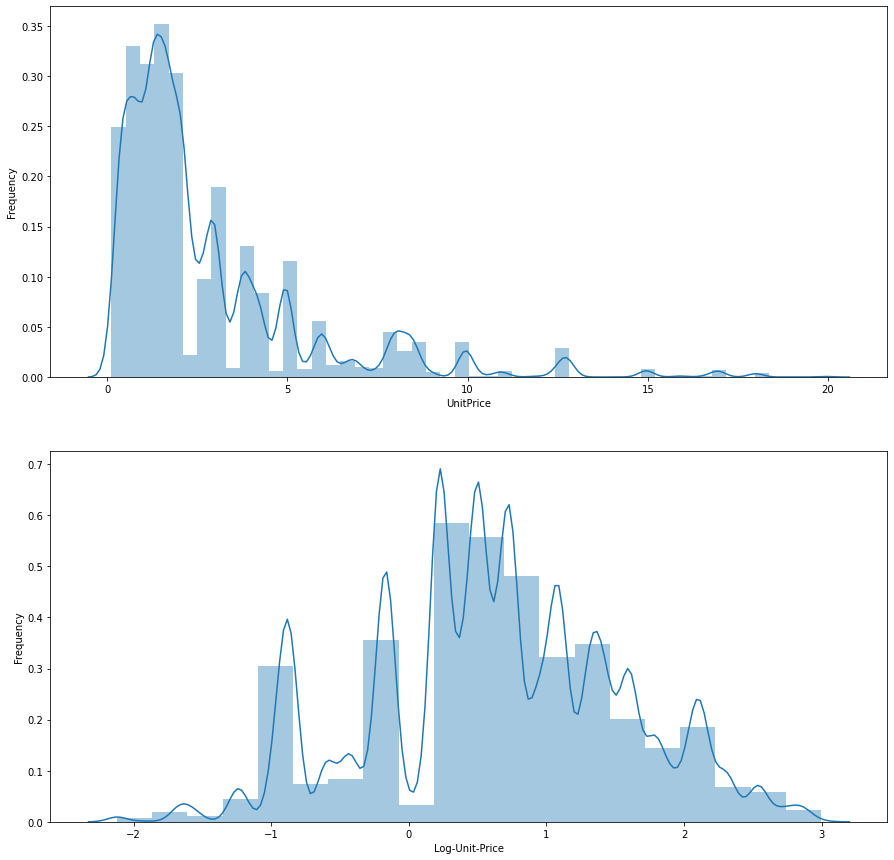

In [30]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

For the graph of the **Quantity** column we can notice that we have a small amount of outliers greater than 70000. It looks like we will be able to keep more than 95% of our data with a max quantity set at 55.


In [31]:
dat.Quantity.describe()

count    396462.000000
mean         12.933943
std         179.461050
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


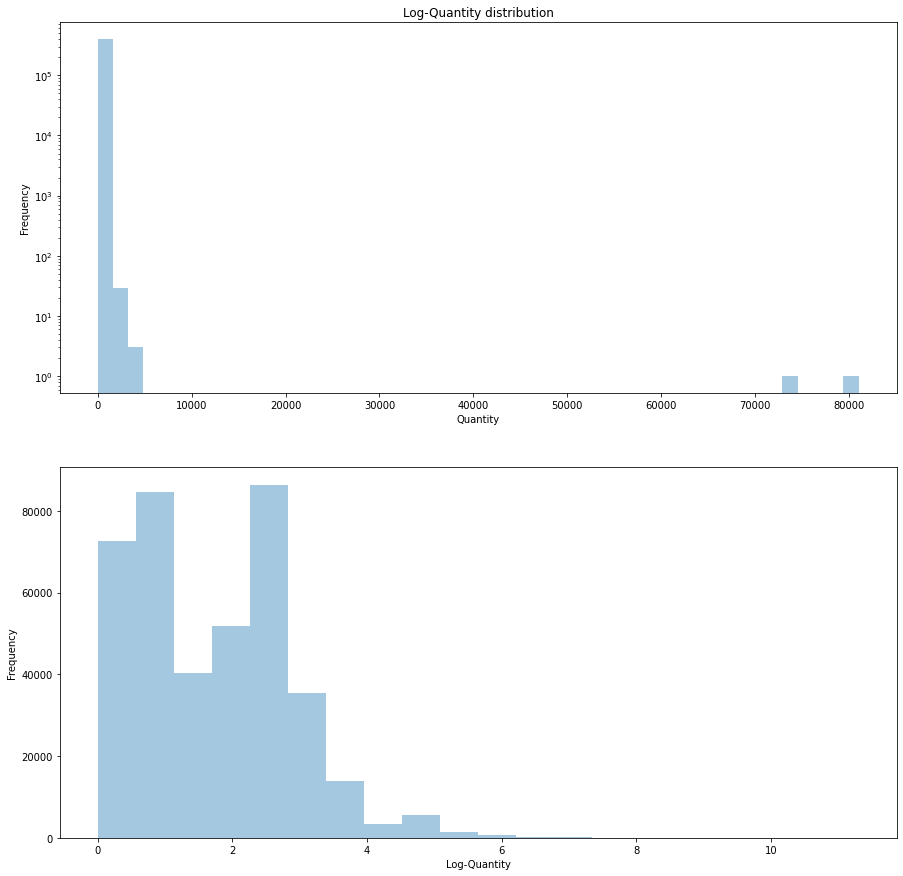

In [32]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

In [33]:
np.exp(4),np.quantile(dat.Quantity, 0.95)

(54.598150033144236, 36.0)

In [34]:
dat = dat.loc[dat.Quantity < 55].copy()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


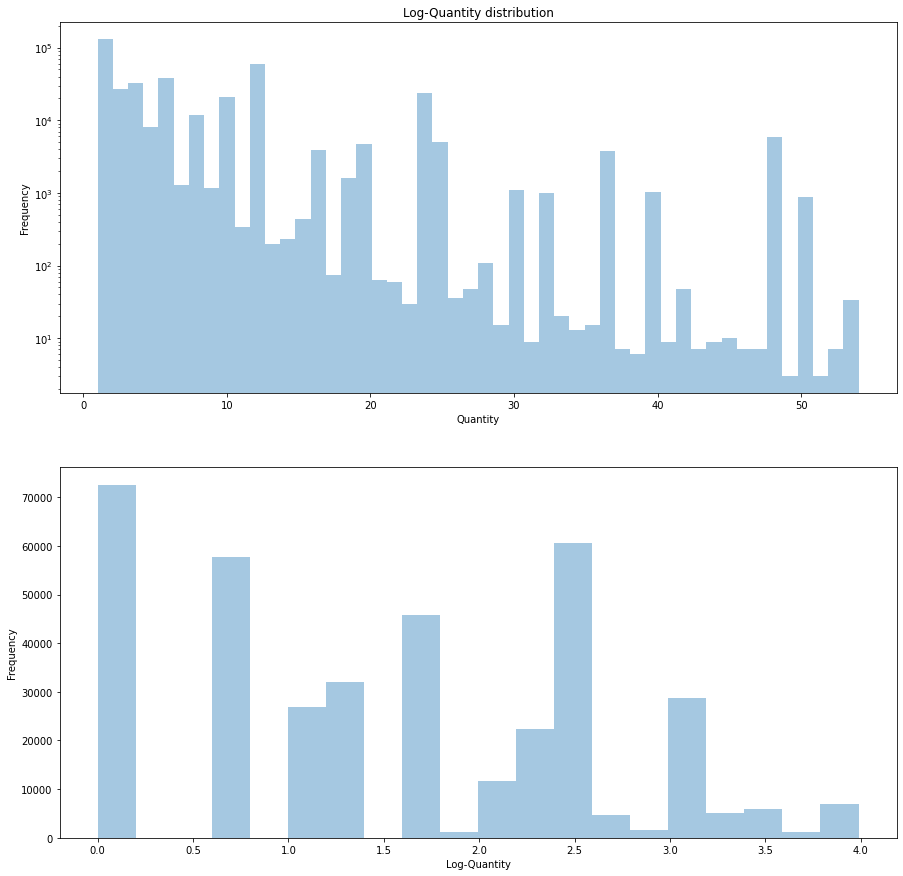

In [35]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

In [36]:
dat.Quantity.describe()

count    385086.000000
mean          8.303200
std           9.298515
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          54.000000
Name: Quantity, dtype: float64

**TIME-SERIES ANALYSIS**

***Which months had the highest Revenue?***


We created new columns that represent different date ranges that we can use. We also created a revenue column in order to determine sales performance in different time ranges. 

After analysing the outputs we saw that **November** is the highest revenue month for the company followed by **October** and then **September**. This could be because these are the months leading up to the holiday season where it is more likely for people to buy gifts and for businesses to increase their inventory.

In [37]:
dat["Revenue"] = dat.Quantity * dat.UnitPrice

dat["Month"] = dat.InvoiceDate.dt.month

dat.groupby('Month').sum().sort_values(by='Revenue', ascending=False)

,Quantity,UnitPrice,Revenue
Month,,,
11,470243,169976.20,880963.29
10,377513,135997.49,706560.60
9,356305,108005.34,657074.10
12,334419,119359.91,652108.14
5,236606,84162.85,482348.18
8,239155,71903.84,429074.45
3,214524,76997.62,419788.80
6,219117,77073.04,414362.30
7,232788,69543.50,409171.27


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


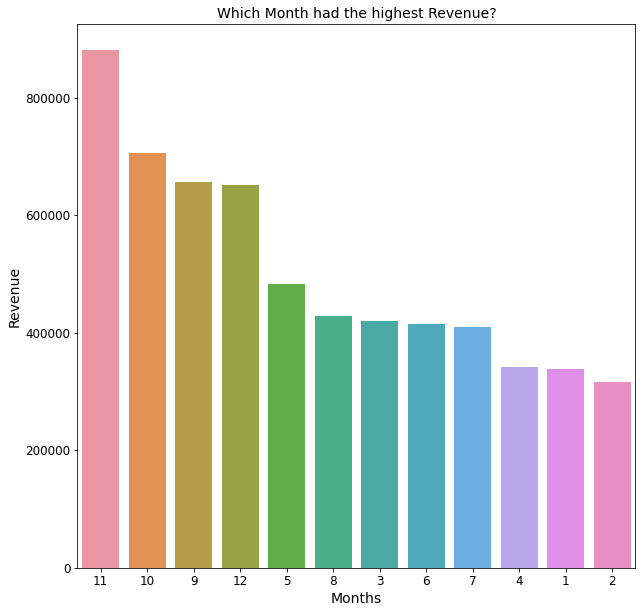

In [38]:
plt.rcParams.update({'font.size': 12})
z = dat.groupby('Month').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("Months", Size=14)
plt.title("Which Month had the highest Revenue?", Size=14);

***What product contributed the most to revenue? Why?***



StockCode 22423 contributed the most to revenue by over $60000. Going deeper into details we find out that it has a higher UnitPrice than the rest of the products. And this allows it to generate more revenue in lower quantities being sold. 

In [39]:
df = dat[['StockCode','Revenue']].groupby('StockCode').sum().sort_values(by='Revenue', ascending=False).iloc[0:9]
df

,Revenue
StockCode,
22423,111996.55
85123A,51928.21
47566,51068.83
POST,42213.27
84879,33697.22
85099B,30480.24
23298,30314.15
22086,27161.93
79321,26697.15


In [41]:
dat[dat['StockCode'] == '22423'].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
488463,577825,22423,REGENCY CAKESTAND 3 TIER,1,2011-11-22 09:42:00,12.75,17453,United Kingdom,12.75,11
117201,546367,22423,REGENCY CAKESTAND 3 TIER,16,2011-03-11 11:38:00,10.95,15513,United Kingdom,175.20,3
352874,567699,22423,REGENCY CAKESTAND 3 TIER,2,2011-09-22 09:16:00,12.75,17466,United Kingdom,25.50,9
289117,562220,22423,REGENCY CAKESTAND 3 TIER,1,2011-08-03 14:19:00,12.75,15150,United Kingdom,12.75,8
185491,552819,22423,REGENCY CAKESTAND 3 TIER,8,2011-05-11 12:50:00,12.75,16652,United Kingdom,102.00,5
